In [1]:
import tqdm
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from models import BondarKinematicModel, ArmstrongKinematicModel, KadaschevichKinematicModel, ChabocheKinematicModel
from matplotlib import pyplot as plt

uys = 960000000
dys = 960000000

def complex_fit(start, stop, step, every_n_point, model, initial, exp):
    consts = initial
    for end in tqdm(range(start, stop, step)):
        mod = model(E=102000000000, mu=0.33, dt=0.06*step, constants = consts, upper_yield_strength=uys, downer_yield_strength=dys)
        mod.fit(strain=exp.Strain.values[:end:every_n_point], 
            stress=exp.Stress.values[:end:every_n_point], 
            upper_yield_strength=uys, 
            downer_yield_strength=dys,
            initial_value=exp.Stress.values[0])
        consts = mod.constants
    return mod
    

## Загрузка данных

In [2]:
type_1 = pd.read_csv('placticity data/Type_1_clear.txt', names=['Strain', 'Stress'])
type_1['Stress']*=1e6

type_2 = pd.read_csv('placticity data/Type_2_clear.txt', names=['Strain', 'Stress'])
type_2['Stress']*=1e6

type_5 = pd.read_csv('placticity data/Type_5_clear.txt', names=['Strain', 'Stress'])
type_5['Stress']*=1e6

type_6 = pd.read_csv('placticity data/Type_6_clear.txt', names=['Strain', 'Stress'])
type_6['Stress']*=1e6

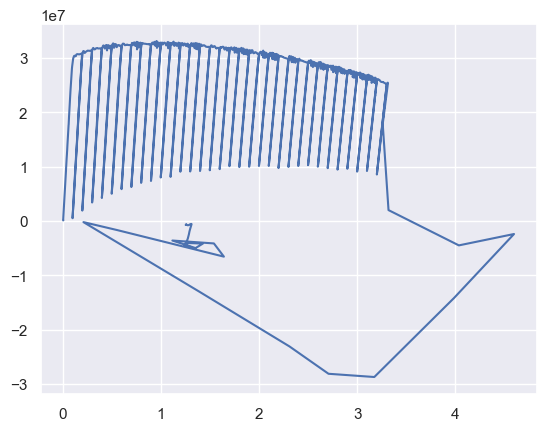

In [28]:
plt.plot(type_1.Strain.values, type_1.Stress.values)

# Модель Кадашевича
## Обучение

In [45]:
len(type_6)

36715

In [48]:
k_model_fitted = complex_fit(100, 36715, 1000, 10, KadaschevichKinematicModel, {'g': 0}, type_6)

  0%|          | 0/37 [00:00<?, ?it/s]

In [49]:
k_model_fitted.constants

{'g': 3.9481931552486226e-07}

In [16]:
end = 36000
stress_predicted = k_model_fitted.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

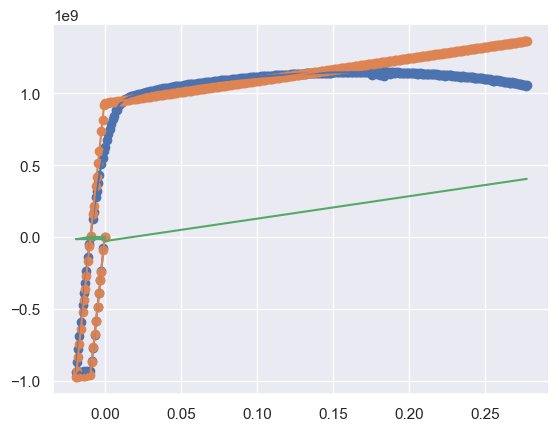

In [17]:
plt.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.plot(type_6.Strain.values[:end:100], stress_predicted)
plt.scatter(type_6.Strain.values[:end:100], stress_predicted)
plt.plot(type_6.Strain.values[:end:100], np.array(k_model_fitted.alphas)*k_model_fitted.G)

## Прогноз

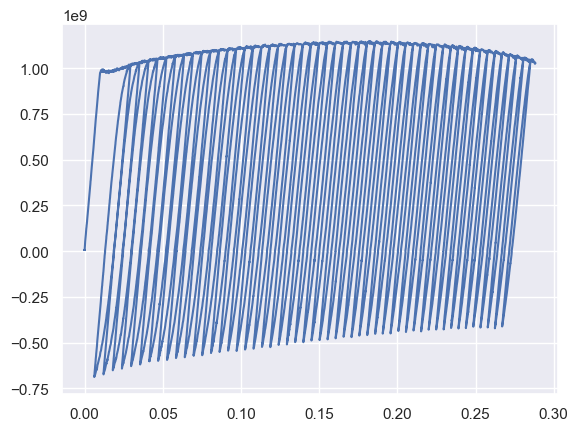

In [19]:
plt.plot(type_2.Strain.values, type_2.Stress.values)

In [28]:
k_model_fitted.constants = {'g': 1e-7}

In [29]:
end = 139509
stress_predicted = k_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

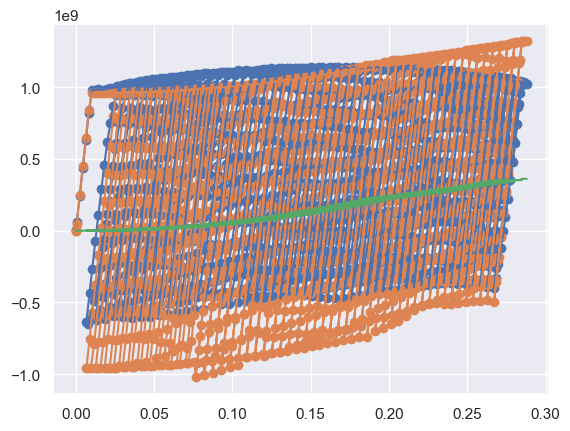

In [30]:
plt.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.plot(type_2.Strain.values[:end:100], stress_predicted)
plt.scatter(type_2.Strain.values[:end:100], stress_predicted)
plt.plot(type_2.Strain.values[:end:100], np.array(k_model_fitted.alphas)*k_model_fitted.G)

## Модель Армстронга

## Обучение

In [67]:
a_model_fitted = complex_fit(100, 36000, 1000, 100, ArmstrongKinematicModel, {'g': 0, 'ga': 0}, type_6)

  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\Sergei\Курсач 2023\models.py:85: RuntimeWarning: overflow encountered in double_scalars
  d_alpha = 2/3*self.constants['g']*strain_rate + self.constants['ga']*alpha*intensity


In [68]:
a_model_fitted.constants

{'g': 0.00020300419455411233, 'ga': -0.03870702858847551}

In [36]:
end = 36000
stress_predicted = a_model_fitted.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

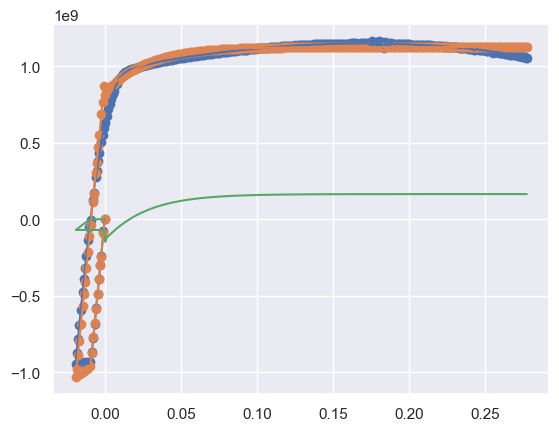

In [37]:
plt.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.plot(type_6.Strain.values[:end:100], stress_predicted)
plt.scatter(type_6.Strain.values[:end:100], stress_predicted)
plt.plot(type_6.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

## Прогноз

In [45]:
end = 50000
stress_predicted = a_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

In [46]:
stress_predicted[abs(stress_predicted)>2e9] = 0

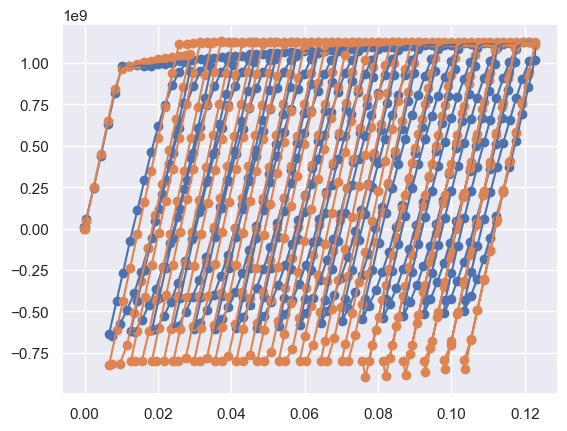

In [47]:
plt.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.plot(type_2.Strain.values[:end:100], stress_predicted)
plt.scatter(type_2.Strain.values[:end:100], stress_predicted)
#plt.plot(type_2.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [48]:
from sklearn.metrics import r2_score
r2_score(type_2.Stress.values[:end:100], stress_predicted)

0.9015501589151363

# Модель Бондаря

## Обучение

In [79]:
b_model_fitted = complex_fit(100, 36000, 1000, 100, BondarKinematicModel, {'Ea': 0.001, 'Betta': 0.04, 'Sigma': 0}, type_6)

  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\Sergei\Курсач 2023\models.py:112: RuntimeWarning: overflow encountered in double_scalars
  d_alpha = 2/3*g*strain_rate + (2/3*ge*strain + ga*alpha)*intensity
C:\Users\Sergei\Курсач 2023\models.py:112: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha = 2/3*g*strain_rate + (2/3*ge*strain + ga*alpha)*intensity


In [80]:
b_model_fitted.constants

{'Ea': -0.0017855607238425697,
 'Betta': 0.021303493731556343,
 'Sigma': 0.09108286106402991}

In [52]:
end = 36000
stress_predicted = b_model_fitted.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

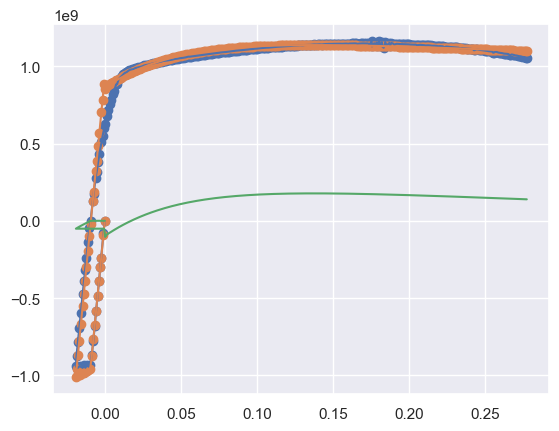

In [53]:
plt.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.plot(type_6.Strain.values[:end:100], stress_predicted)
plt.scatter(type_6.Strain.values[:end:100], stress_predicted)
plt.plot(type_6.Strain.values[:end:100], np.array(b_model_fitted.alphas)*b_model_fitted.G)

In [56]:
end = 50000
stress_predicted = b_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

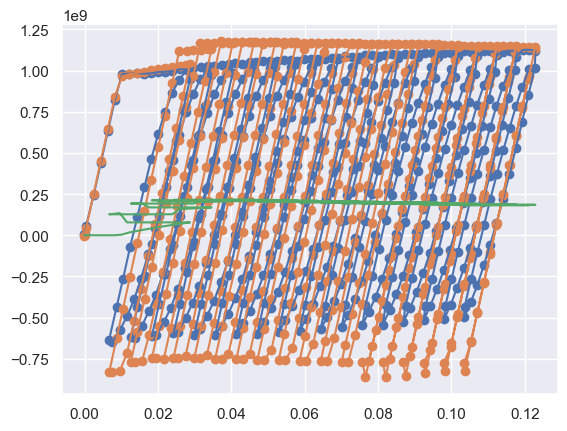

In [57]:
plt.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.plot(type_2.Strain.values[:end:100], stress_predicted)
plt.scatter(type_2.Strain.values[:end:100], stress_predicted)
plt.plot(type_2.Strain.values[:end:100], np.array(b_model_fitted.alphas)*b_model_fitted.G)

In [58]:
from sklearn.metrics import r2_score
r2_score(type_2.Stress.values[:end:100], stress_predicted)

0.9140753160820285

## Модель Шабоша

## Обучение

In [110]:
с_model_fitted = complex_fit(100, 36000, 1500, 100, ChabocheKinematicModel, 
                             {'n_alphas': int(3), 'g_1': 0.0, 'g_2': 0.0, 'g_3': 0.0, 'ga_1': 0.0, 'ga_2': 0.0, 'ga_3': 0.0, 'a_1': 0.0, 'a_2': 0.0, 'a_3': 0.0}, 
                             type_6)

  0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\Sergei\Курсач 2023\models.py:139: RuntimeWarning: overflow encountered in double_scalars
  d_alpha_i = 2/3*self.constants[f'g_{i}']*strain_rate + self.constants[f'ga_{i}']*self.constants[f'a_{i}']*intensity
C:\Users\Sergei\Курсач 2023\models.py:143: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha = sum(d_alphas)
C:\Users\Sergei\Курсач 2023\models.py:140: RuntimeWarning: invalid value encountered in double_scalars
  self.constants[f'a_{i}'] += d_alpha_i
C:\Users\Sergei\Курсач 2023\models.py:139: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha_i = 2/3*self.constants[f'g_{i}']*strain_rate + self.constants[f'ga_{i}']*self.constants[f'a_{i}']*intensity
C:\Users\Sergei\Курсач 2023\uniaxial.py:264: RuntimeWarning: overflow encountered in double_scalars
  sigma_pred = (alpha + d_alpha)*self.G - yield_strengt
C:\Users\Sergei\Курсач 2023\uniaxial.py:262: RuntimeWarning: overflow encountered in double_scalars
  sigma_pred = (alpha + d_alpha)*se

In [102]:
с_model_fitted.constants

{'n_alphas': 3.0,
 'g_1': 7.434774487811906e-07,
 'g_2': 0.0001085842610321895,
 'g_3': -0.0002853569418703052,
 'ga_1': -0.2761636178392538,
 'ga_2': -0.024453866538941438,
 'ga_3': -0.2966055447213269,
 'a_1': -0.0019586992752141106,
 'a_2': -0.0003910671550176544,
 'a_3': 0.0007279421287298266}

In [108]:
end = 36000
stress_predicted = с_model_fitted.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

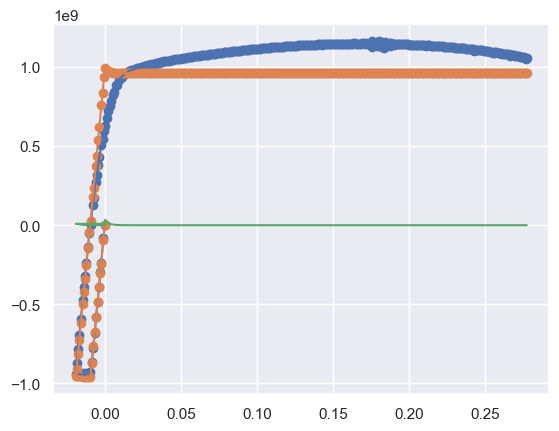

In [109]:
plt.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100])
plt.plot(type_6.Strain.values[:end:100], stress_predicted)
plt.scatter(type_6.Strain.values[:end:100], stress_predicted)
plt.plot(type_6.Strain.values[:end:100], np.array(с_model_fitted.alphas)*с_model_fitted.G)

In [11]:
end = 50000
stress_predicted = с_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

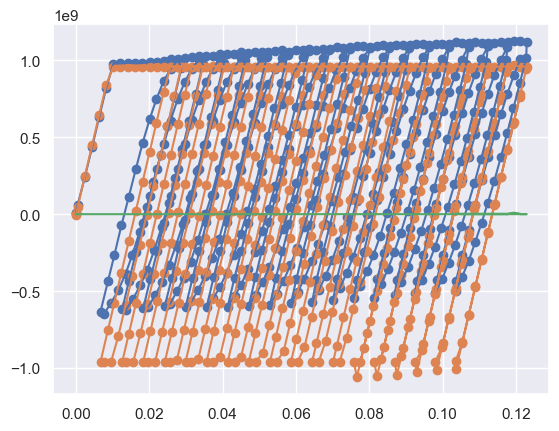

In [14]:
plt.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100])
plt.plot(type_2.Strain.values[:end:100], stress_predicted)
plt.scatter(type_2.Strain.values[:end:100], stress_predicted)
plt.plot(type_2.Strain.values[:end:100], np.array(с_model_fitted.alphas)*с_model_fitted.G)

In [15]:
from sklearn.metrics import r2_score
r2_score(type_2.Stress.values[:end:100], stress_predicted)

0.7292603760002363

# Обучение на 2 экспериментах

## Кадашевич

In [113]:
k_model_fitted = complex_fit(100, 50000, 1000, 10, KadaschevichKinematicModel, k_model_fitted.constants, type_2)

  0%|          | 0/50 [00:00<?, ?it/s]

In [114]:
k_model_fitted.constants

{'g': 4.78799409930565e-07}

In [73]:
end = 260000
stress_predicted = k_model_fitted.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

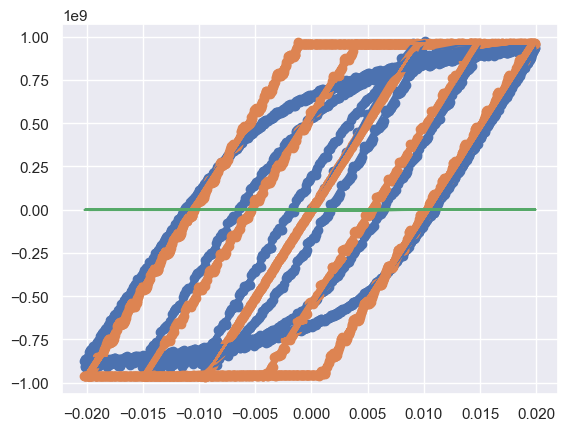

In [74]:
plt.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.plot(type_5.Strain.values[:end:100], stress_predicted)
plt.scatter(type_5.Strain.values[:end:100], stress_predicted)
plt.plot(type_5.Strain.values[:end:100], np.array(k_model_fitted.alphas)*k_model_fitted.G)

## Армстронг

In [169]:
a_model_fitted = complex_fit(100, 20000, 2000, 10,ArmstrongKinematicModel, {'g': 0.0003, 'ga': -0.2}, type_2)#a_model_fitted.constants, type_2)

  0%|          | 0/10 [00:00<?, ?it/s]

In [170]:
a_model_fitted.constants

{'g': 3.034181846317808e-05, 'ga': -0.005044938173935879}

In [171]:
end = 260000
stress_predicted = a_model_fitted.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=0.75e9, downer_yield_strength=0.75e9)

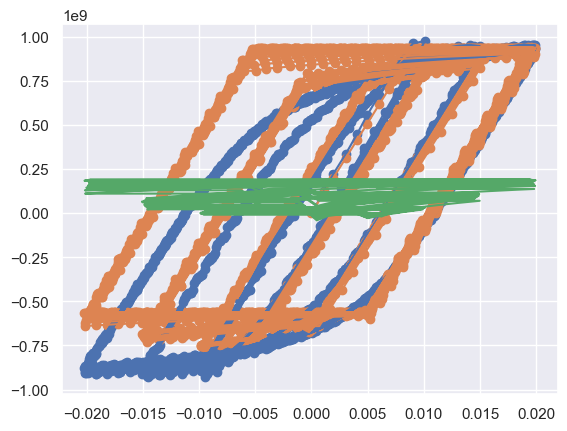

In [172]:
plt.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.plot(type_5.Strain.values[:end:100], stress_predicted)
plt.scatter(type_5.Strain.values[:end:100], stress_predicted)
plt.plot(type_5.Strain.values[:end:100], np.array(a_model_fitted.alphas)*a_model_fitted.G)

In [98]:
from sklearn.metrics import r2_score
r2_score(type_5.Stress.values[:end:100], stress_predicted)

0.8966254573808743

## Бондарь

In [117]:
b_model_fitted = complex_fit(100, 50000, 1000, 150,BondarKinematicModel, b_model_fitted.constants, type_2)

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Sergei\Курсач 2023\models.py:112: RuntimeWarning: overflow encountered in double_scalars
  d_alpha = 2/3*g*strain_rate + (2/3*ge*strain + ga*alpha)*intensity
C:\Users\Sergei\Курсач 2023\uniaxial.py:410: RuntimeWarning: invalid value encountered in double_scalars
  d_plastic = plastic[0] - plastic[1]


In [118]:
b_model_fitted.constants

{'Ea': -0.0010594775931342412,
 'Betta': 0.02097007727430107,
 'Sigma': 0.06032156009221862}

In [102]:
end = 260000
stress_predicted = b_model_fitted.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=0.75e9, downer_yield_strength=0.75e9)

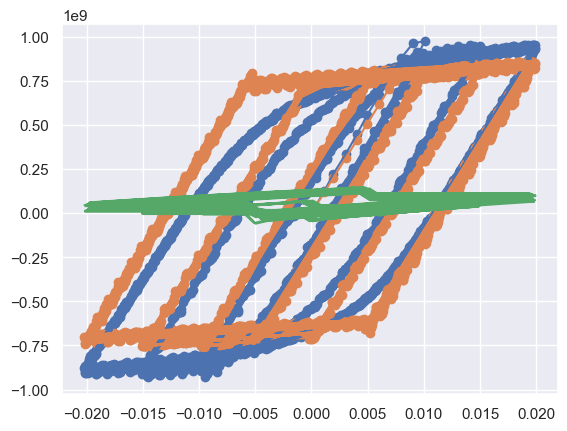

In [103]:
plt.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.plot(type_5.Strain.values[:end:100], stress_predicted)
plt.scatter(type_5.Strain.values[:end:100], stress_predicted)
plt.plot(type_5.Strain.values[:end:100], np.array(b_model_fitted.alphas)*b_model_fitted.G)

In [104]:
from sklearn.metrics import r2_score
r2_score(type_5.Stress.values[:end:100], stress_predicted)

0.9656162414353533

## Шабош

In [119]:
c_model_fitted = complex_fit(100, 25000, 15000, 150, ChabocheKinematicModel, с_model_fitted.constants, type_2)

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\Sergei\Курсач 2023\models.py:139: RuntimeWarning: overflow encountered in double_scalars
  d_alpha_i = 2/3*self.constants[f'g_{i}']*strain_rate + self.constants[f'ga_{i}']*self.constants[f'a_{i}']*intensity
C:\Users\Sergei\Курсач 2023\models.py:140: RuntimeWarning: invalid value encountered in double_scalars
  self.constants[f'a_{i}'] += d_alpha_i
C:\Users\Sergei\Курсач 2023\models.py:139: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha_i = 2/3*self.constants[f'g_{i}']*strain_rate + self.constants[f'ga_{i}']*self.constants[f'a_{i}']*intensity
C:\Users\Sergei\Курсач 2023\models.py:143: RuntimeWarning: invalid value encountered in double_scalars
  d_alpha = sum(d_alphas)


In [120]:
c_model_fitted.constants

{'n_alphas': 3.0,
 'g_1': 0.005978028189253452,
 'g_2': 0.0010090539043143341,
 'g_3': -0.005701272953245502,
 'ga_1': -0.2194151241804672,
 'ga_2': -0.018369610689213466,
 'ga_3': -0.2713250708550959,
 'a_1': 0.00928140308817404,
 'a_2': 0.0367356227893659,
 'a_3': -0.004772165102975406}

In [24]:
end = 260000
stress_predicted = c_model_fitted.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=0.75e9, downer_yield_strength=0.75e9)

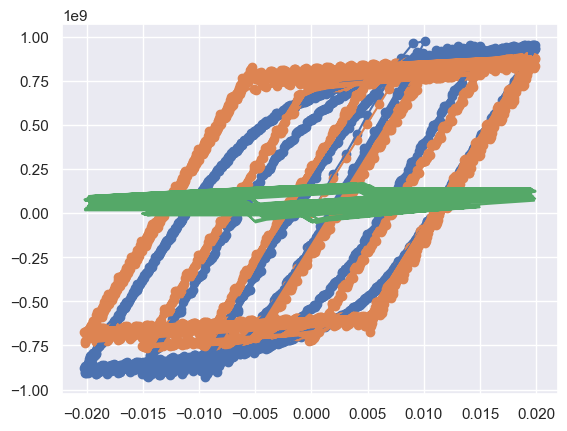

In [25]:
plt.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100])
plt.plot(type_5.Strain.values[:end:100], stress_predicted)
plt.scatter(type_5.Strain.values[:end:100], stress_predicted)
plt.plot(type_5.Strain.values[:end:100], np.array(c_model_fitted.alphas)*c_model_fitted.G)

In [26]:
from sklearn.metrics import r2_score
r2_score(type_5.Stress.values[:end:100], stress_predicted)

0.959642315824617

_________________________________________
# Кадашевич, эксперимент 1

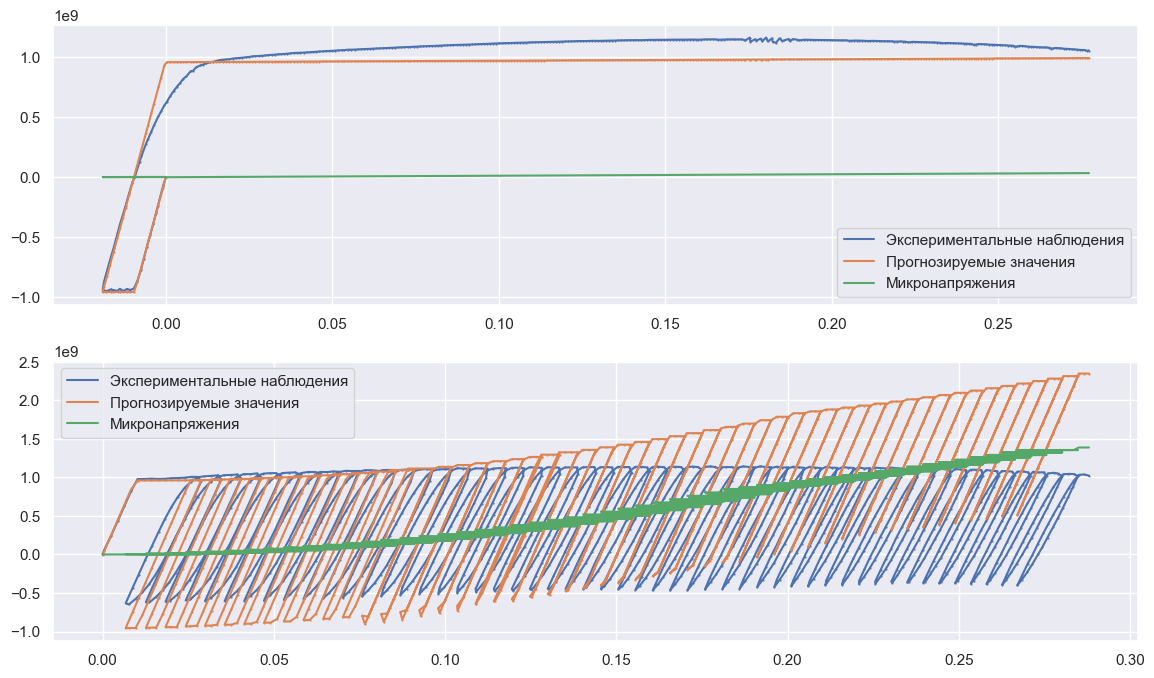

In [53]:
#k_model = KadaschevichKinematicModel(E=102000000000, mu=0.33, dt=0.06*100, constants = {'g': 5.0419627325693875e-06}, upper_yield_strength=uys, downer_yield_strength=dys)
k_model = k_model_fitted
k_model.mean_plastic_strain = k_model_fitted.mean_plastic_strain
end = 36000
stress_predicted = k_model.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))
#plt.figure(figsize=(15,12))
#ax1.figure(figsize=(15,6))
ax1.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], label='Экспериментальные наблюдения')
ax1.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], s=0.3)
ax1.plot(type_6.Strain.values[:end:100], stress_predicted, label='Прогнозируемые значения')
ax1.scatter(type_6.Strain.values[:end:100], stress_predicted, s=0.3)
ax1.plot(type_6.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
ax1.legend()

end = 139509
stress_predicted_2 = k_model_fitted.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys)

ax2.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], label='Экспериментальные наблюдения')
ax2.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], s=0.3)
ax2.plot(type_2.Strain.values[:end:100], stress_predicted_2, label='Прогнозируемые значения')
ax2.scatter(type_2.Strain.values[:end:100], stress_predicted_2, s=0.3)
ax2.plot(type_2.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
ax2.legend()

In [54]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(type_6.Stress.values[:36000:100], stress_predicted)

0.9299889700642663

In [56]:
mean_squared_error(type_6.Stress.values[:36000:100], stress_predicted)

1.7216710199572946e+16

_____________________________
Напишемм функцию ради удобства

In [111]:
def get_full_result(model, end_1, end_2, uys, dys1, dys2):
    k_model = model
    #k_model.mean_plastic_strain = k_model_fitted.mean_plastic_strain
    end = end_1
    stress_predicted = k_model.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys1)



    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8))
    #plt.figure(figsize=(15,12))
    #ax1.figure(figsize=(15,6))
    ax1.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], label='Экспериментальные наблюдения')
    ax1.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], s=0.3)
    ax1.plot(type_6.Strain.values[:end:100], stress_predicted, label='Прогнозируемые значения')
    ax1.scatter(type_6.Strain.values[:end:100], stress_predicted, s=0.3)
    ax1.plot(type_6.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    ax1.legend()

    end = end_2
    stress_predicted_2 = k_model.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys2)

    ax2.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], label='Экспериментальные наблюдения')
    ax2.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], s=0.3)
    ax2.plot(type_2.Strain.values[:end:100], stress_predicted_2, label='Прогнозируемые значения')
    ax2.scatter(type_2.Strain.values[:end:100], stress_predicted_2, s=0.3)
    ax2.plot(type_2.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    ax2.legend()
    
    print('Experiment 1 r^2: ', r2_score(type_6.Stress.values[:end_1:100], stress_predicted))
    print('Experiment 1 mse: ', mean_squared_error(type_6.Stress.values[:end_1:100], stress_predicted))
    print('Experiment 2 r^2: ', r2_score(type_2.Stress.values[:end_2:100], stress_predicted_2))
    print('Experiment 2 mse: ', mean_squared_error(type_2.Stress.values[:end_2:100], stress_predicted_2))

___________________________

Experiment 1 r^2:  0.9299889700642663
Experiment 1 mse:  1.7216710199572946e+16
Experiment 2 r^2:  0.9073440054455104
Experiment 2 mse:  2.769974168624396e+16


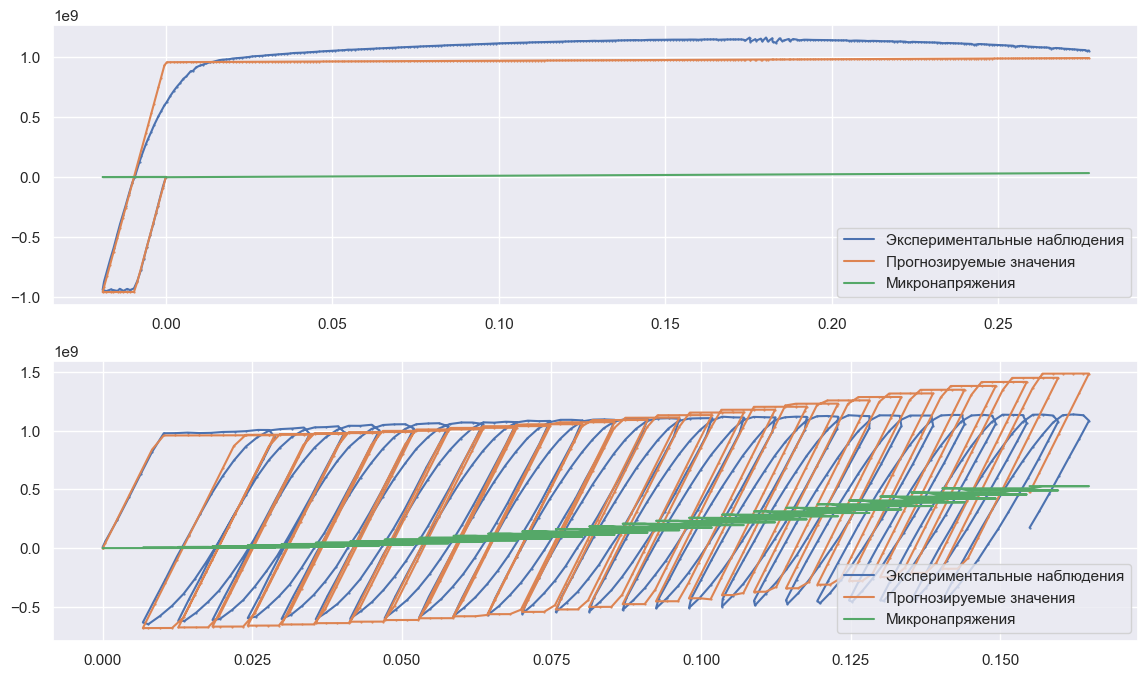

In [86]:
get_full_result(k_model_fitted, 36000, 70000, uys, dys, dys/1.4)

## Армстронг, эксперимент 1

Experiment 1 r^2:  0.9936581832326915
Experiment 1 mse:  1559543139442004.0
Experiment 2 r^2:  0.9599110285431869
Experiment 2 mse:  1.2236319180273198e+16


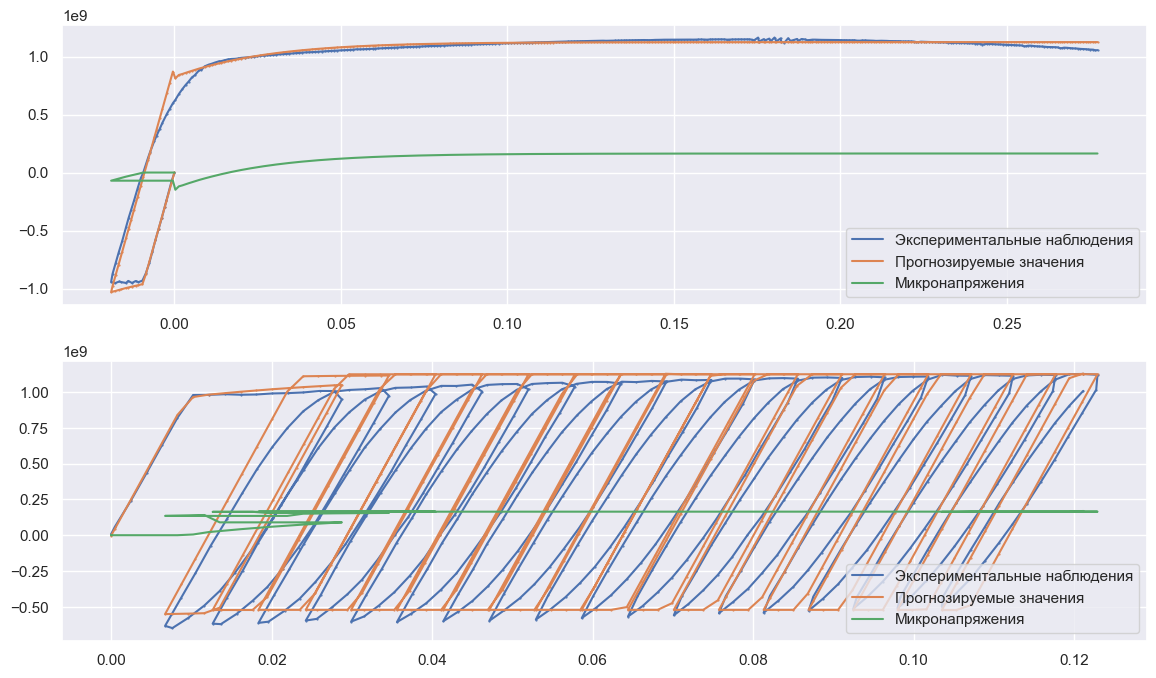

In [88]:
get_full_result(a_model_fitted, 36000, 50000, uys, dys, dys/1.4)

## Бондарь, эксперимент 1

Experiment 1 r^2:  0.9940657544540148
Experiment 1 mse:  1459315566591695.0
Experiment 2 r^2:  0.9433752561331179
Experiment 2 mse:  1.728351749315412e+16


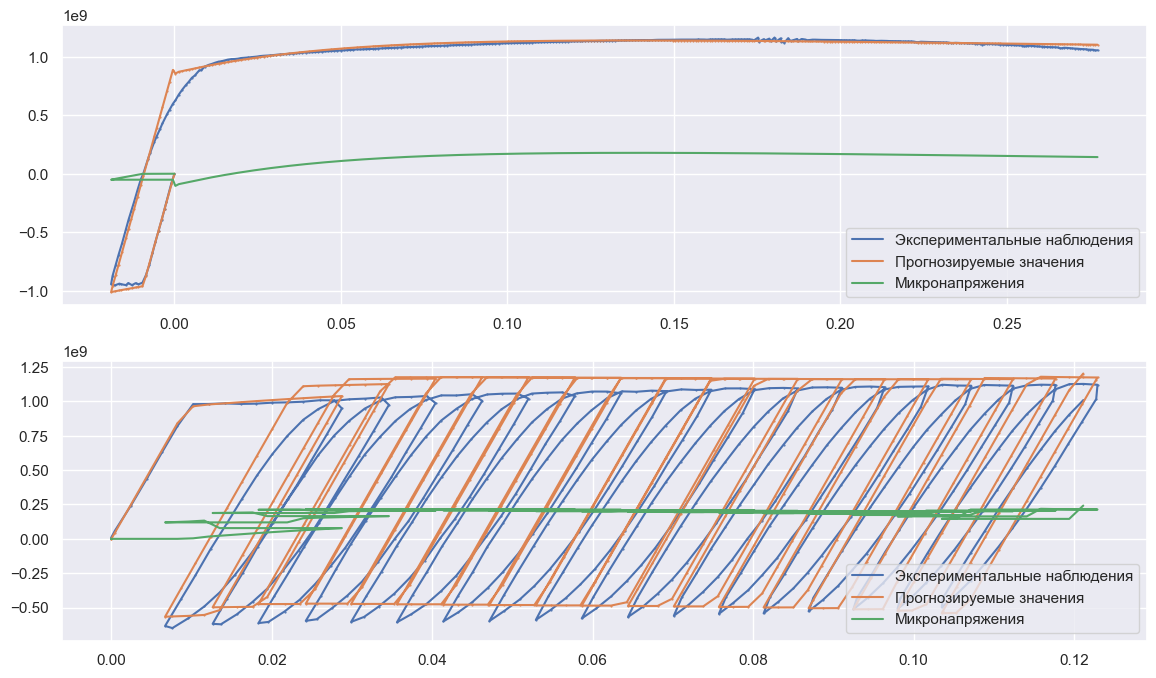

In [89]:
get_full_result(b_model_fitted, 36000, 50000, uys, dys, dys/1.4)

## Шабош, эксперимент 1

Experiment 1 r^2:  0.9941912229300381
Experiment 1 mse:  1428461079907838.2
Experiment 2 r^2:  0.9317671943186737
Experiment 2 mse:  2.0826635319933404e+16


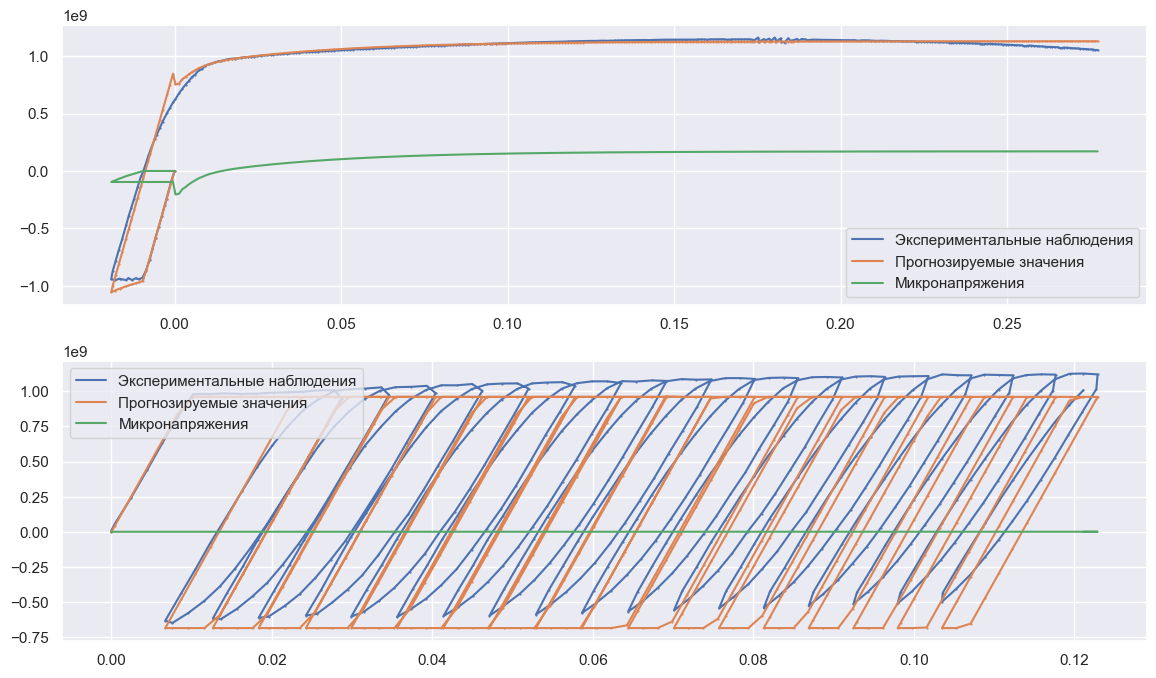

In [112]:
get_full_result(с_model_fitted, 36000, 50000, uys, dys, dys/1.4)

# Эксперимент 2

In [129]:
def get_full_result_2(model, end_1, end_2, end_3, uys, uys3, dys1, dys2, dys3):
    k_model = model
    #k_model.mean_plastic_strain = k_model_fitted.mean_plastic_strain
    end = end_1
    stress_predicted = k_model.predict(strain=type_6.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys1)


    """
    #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))
    #plt.figure(figsize=(15,12))
    #ax1.figure(figsize=(15,6))
    ax1.plot(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], label='Экспериментальные наблюдения')
    ax1.scatter(type_6.Strain.values[:end:100], type_6.Stress.values[:end:100], s=0.3)
    ax1.plot(type_6.Strain.values[:end:100], stress_predicted, label='Прогнозируемые значения')
    ax1.scatter(type_6.Strain.values[:end:100], stress_predicted, s=0.3)
    ax1.plot(type_6.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    ax1.legend()

    end = end_2
    stress_predicted_2 = k_model.predict(strain=type_2.Strain.values[:end:100], upper_yield_strength=uys, downer_yield_strength=dys2)

    ax2.plot(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], label='Экспериментальные наблюдения')
    ax2.scatter(type_2.Strain.values[:end:100], type_2.Stress.values[:end:100], s=0.3)
    ax2.plot(type_2.Strain.values[:end:100], stress_predicted_2, label='Прогнозируемые значения')
    ax2.scatter(type_2.Strain.values[:end:100], stress_predicted_2, s=0.3)
    ax2.plot(type_2.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    ax2.legend()
    
    end = end_3
    stress_predicted_3 = k_model.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=uys3, downer_yield_strength=dys3)

    ax3.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100], label='Экспериментальные наблюдения')
    ax3.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100], s=0.3)
    ax3.plot(type_5.Strain.values[:end:100], stress_predicted_3, label='Прогнозируемые значения')
    ax3.scatter(type_5.Strain.values[:end:100], stress_predicted_3, s=0.3)
    ax3.plot(type_5.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    ax3.legend()
    """
  
    end = end_3
    stress_predicted_3 = k_model.predict(strain=type_5.Strain.values[:end:100], upper_yield_strength=uys3, downer_yield_strength=dys3)
    plt.figure(figsize=(15,6))
    plt.plot(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100], label='Экспериментальные наблюдения')
    plt.scatter(type_5.Strain.values[:end:100], type_5.Stress.values[:end:100], s=0.3)
    plt.plot(type_5.Strain.values[:end:100], stress_predicted_3, label='Прогнозируемые значения')
    plt.scatter(type_5.Strain.values[:end:100], stress_predicted_3, s=0.3)
    plt.plot(type_5.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    plt.legend()
    #print('Experiment 1 r^2: ', r2_score(type_6.Stress.values[:end_1:100], stress_predicted))
    #print('Experiment 1 mse: ', mean_squared_error(type_6.Stress.values[:end_1:100], stress_predicted))
    #print('Experiment 2 r^2: ', r2_score(type_2.Stress.values[:end_2:100], stress_predicted_2))
    #print('Experiment 2 mse: ', mean_squared_error(type_2.Stress.values[:end_2:100], stress_predicted_2))
    print('Experiment 3 r^2: ', r2_score(type_5.Stress.values[:end_3:100], stress_predicted_3))
    print('Experiment 3 mse: ', mean_squared_error(type_5.Stress.values[:end_3:100], stress_predicted_3))

Experiment 3 r^2:  0.9614106024874645
Experiment 3 mse:  1.633733946632899e+16


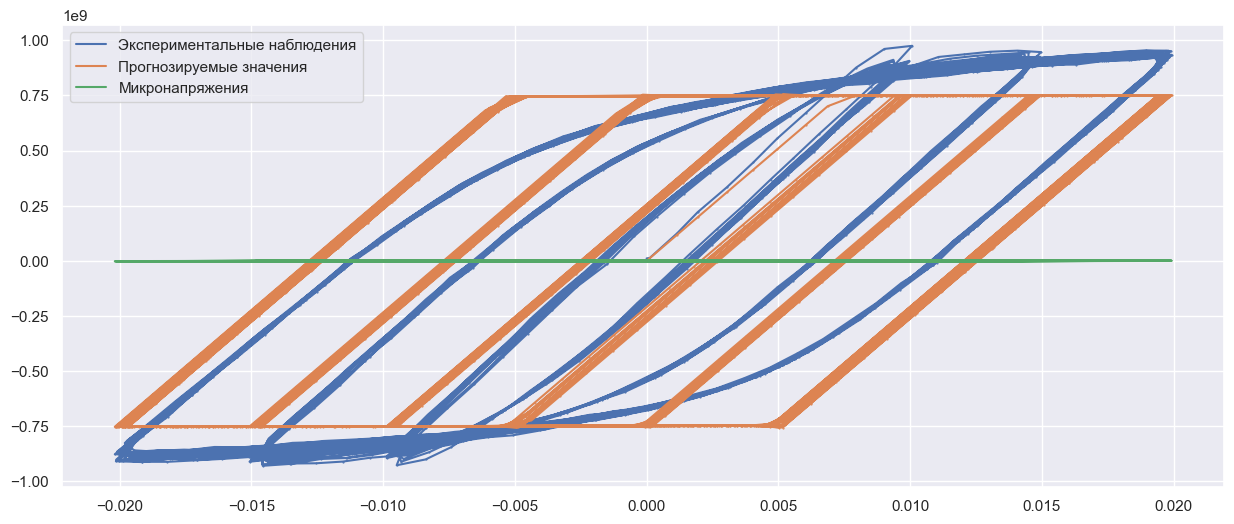

In [130]:
get_full_result_2(k_model_fitted, 36000, 70000, 260000, uys, 0.75e9, dys, dys/1.4, 0.75e9)

Experiment 3 r^2:  0.9214062685686173
Experiment 3 mse:  3.3273711254571612e+16


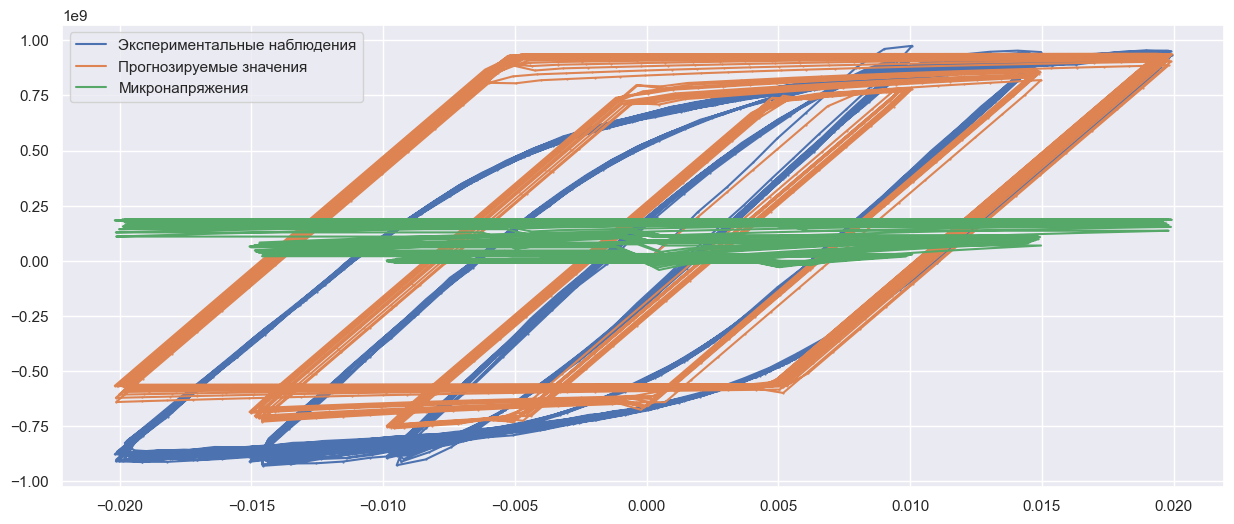

In [173]:
get_full_result_2(a_model_fitted, 36000, 70000, 260000, uys, 0.75e9, dys, dys/1.4, 0.75e9)

Experiment 3 r^2:  0.9656162414353533
Experiment 3 mse:  1.4556825760662702e+16


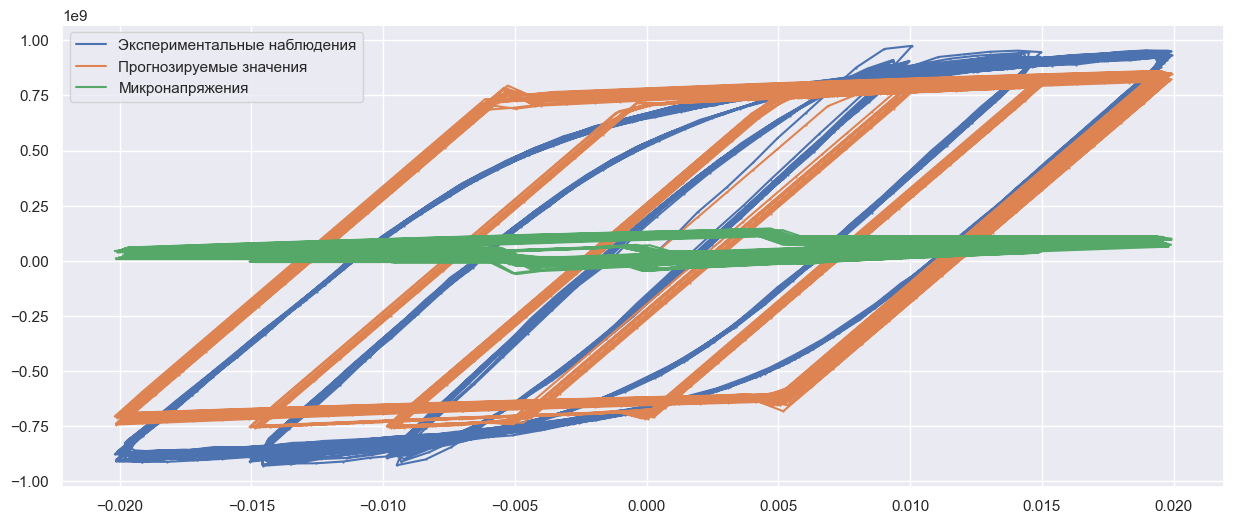

In [174]:
get_full_result_2(b_model_fitted, 36000, 70000, 260000, uys, 0.75e9, dys, dys/1.4, 0.75e9)

Experiment 3 r^2:  0.9609546767681769
Experiment 3 mse:  1.6530361739999176e+16


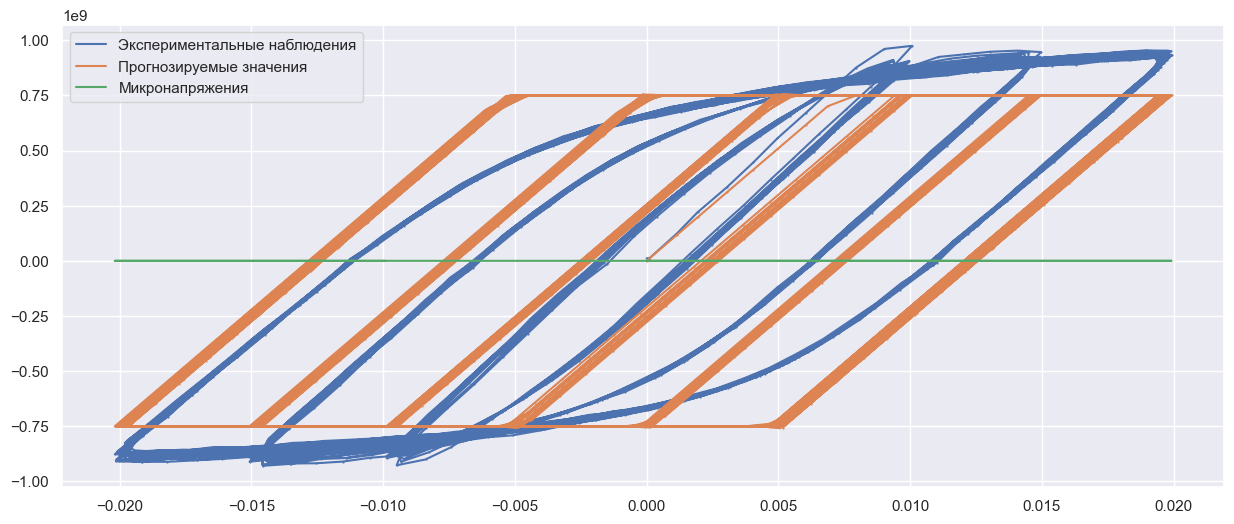

In [176]:
get_full_result_2(с_model_fitted, 36000, 70000, 260000, uys, 0.75e9, dys, dys/1.4, 0.75e9)

# Эксперимент 3

In [179]:
k_model_fitted = complex_fit(100, 260000, 1000, 100, KadaschevichKinematicModel, k_model_fitted.constants, type_5)

  0%|          | 0/260 [00:00<?, ?it/s]

Experiment 3 r^2:  0.9793824952009365
Experiment 3 mse:  8728697428912952.0


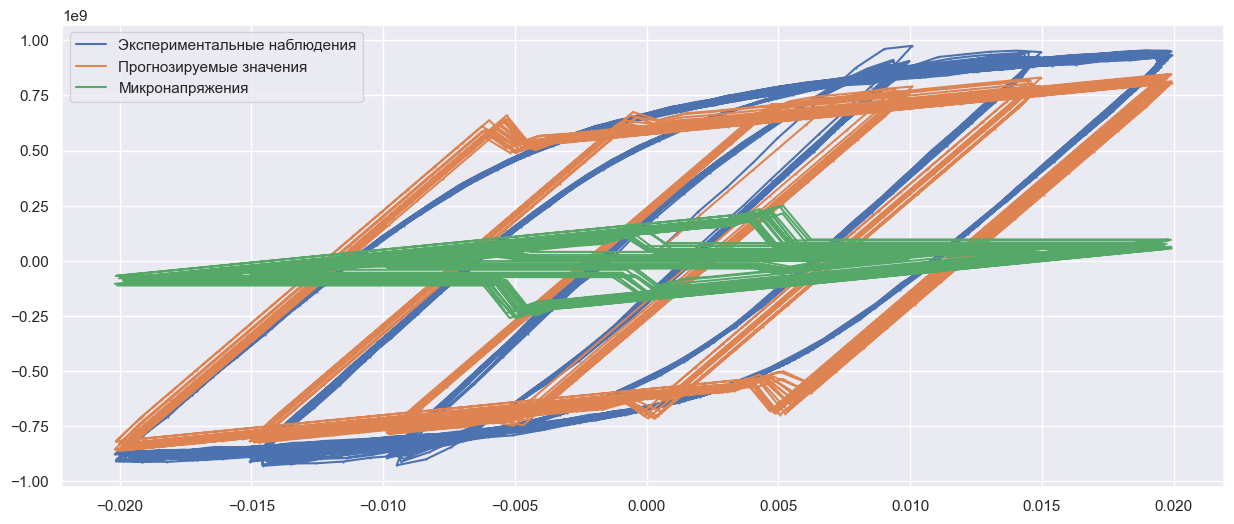

In [180]:
get_full_result_2(k_model_fitted, 36000, 70000, 260000, uys, 0.75e9, dys, dys/1.4, 0.75e9)

In [ ]:
def get_full_result_3(model,end_3, uys3, dys1,dys3):
    k_model = model

  
    end = end_3
    stress_predicted_3 = k_model.predict(strain=type_1.Strain.values[:end:100], upper_yield_strength=uys3, downer_yield_strength=dys3)
    plt.figure(figsize=(15,6))
    plt.plot(type_1.Strain.values[:end:100], type_1.Stress.values[:end:100], label='Экспериментальные наблюдения')
    plt.scatter(type_1.Strain.values[:end:100], type_1.Stress.values[:end:100], s=0.3)
    plt.plot(type_1.Strain.values[:end:100], stress_predicted_3, label='Прогнозируемые значения')
    plt.scatter(type_1.Strain.values[:end:100], stress_predicted_3, s=0.3)
    plt.plot(type_1.Strain.values[:end:100], np.array(k_model.alphas)*k_model.G, label='Микронапряжения')
    plt.legend()
    #print('Experiment 1 r^2: ', r2_score(type_6.Stress.values[:end_1:100], stress_predicted))
    #print('Experiment 1 mse: ', mean_squared_error(type_6.Stress.values[:end_1:100], stress_predicted))
    #print('Experiment 2 r^2: ', r2_score(type_2.Stress.values[:end_2:100], stress_predicted_2))
    #print('Experiment 2 mse: ', mean_squared_error(type_2.Stress.values[:end_2:100], stress_predicted_2))
    print('Experiment 3 r^2: ', r2_score(type_5.Stress.values[:end_3:100], stress_predicted_3))
    print('Experiment 3 mse: ', mean_squared_error(type_5.Stress.values[:end_3:100], stress_predicted_3))